# Graphically Exploring your data 
In this notebook we will look at ways to graphically depict your data and explore various relationships that might exist. Before running this notebook please save out the plot_data.csv and plot_subplot.csv files from the Summarizing_plot_data.ipynb notebooks. 

## Import packages

In [2]:
import pandas as pd

### Load the plot_subplot.csv files into a dataframe, separate response and predictor variables, and describe the data.

In [3]:
plot_sub_df= pd.read_csv('plot_subplot_data.csv')
plot_sub_df.columns


Index(['Unnamed: 0', 'plotid', 'sampleid', 'Use', 'Cover', 'Vegetation',
       'Herbaceous', 'Grass', 'Cultivation', 'WetLand', 'Terrain', 'Water',
       'Another Class', 'SAF', 'Changes15_', 'Win_Lose', 'geometry', 'BLUE',
       'GREEN', 'NIR', 'RED', 'SWIR1', 'SWIR2', 'altura2', 'aspect',
       'aspectcos', 'aspectdeg', 'aspectYesn', 'brightness', 'clay_1mMed',
       'diff', 'elevation', 'evi', 'fpar', 'hand30_100', 'lai', 'mTPI', 'ndvi',
       'ocs_1mMed', 'sand_1mMed', 'savi', 'Yeslt_1mMed', 'slope', 'topDiv',
       'wetness'],
      dtype='object')

In [4]:
ids=['plotid', 'sampleid', ]

resp=['Use', 'Cover', 'Vegetation',
       'Herbaceous', 'Grass', 'Cultivation', 'WetLand', 'Terrain', 'Water',
       'Another Class', 'SAF',]

pred=['BLUE',
       'GREEN', 'NIR', 'RED', 'SWIR1', 'SWIR2', 'altura2', 'aspect',
       'aspectcos', 'aspectdeg', 'aspectYesn', 'brightness', 'clay_1mMed',
       'diff', 'elevation', 'evi', 'fpar', 'hand30_100', 'lai', 'mTPI', 'ndvi',
       'ocs_1mMed', 'sand_1mMed', 'savi', 'Yeslt_1mMed', 'slope', 'topDiv',
       'wetness']

In [5]:
plot_sub_df[resp].describe()

Use       Cover Vegetation      Herbaceous           Grass  \
count   100614      100614     100614          100614          100614   
unique       8           7          9               5               4   
top     Forest  Vegetation       Tree  Not_Applicable  Not_Applicable   
freq     58464       93811      60744           76196           77372   

           Cultivation         WetLand Terrain           Water  \
count           100614          100614  100614          100614   
unique              11               6       6               3   
top     Not_Applicable  Not_Applicable  Forest  Not_Applicable   
freq             92235           96881   58439           99888   

         Another Class             SAF  
count           100614          100614  
unique               7               4  
top     Not_Applicable  Not_Applicable  
freq             95203           92235

In [6]:
plot_sub_df[pred].describe()

BLUE          GREEN            NIR            RED  \
count  100614.000000  100614.000000  100614.000000  100614.000000   
mean        0.028771       0.054727       0.327123       0.040732   
std         0.055654       0.053766       0.093570       0.055499   
min        -0.151325      -0.012835       0.000172       0.000007   
25%         0.016535       0.037325       0.268160       0.020303   
50%         0.023025       0.047308       0.325607       0.028993   
75%         0.030725       0.061800       0.384980       0.047087   
max         1.063955       1.024878       0.980080       1.010193   

               SWIR1          SWIR2        altura2         aspect  \
count  100614.000000  100614.000000  100614.000000  100614.000000   
mean        0.167714       0.078059      21.778957     171.313736   
std         0.060011       0.040436      10.037330     105.541676   
min        -0.000983       0.000777       0.000000       0.000000   
25%         0.129395       0.051708      16.000000      81.228270   
50%         0.162367       0.068290      22.000000     173.564285   
75%         0.200977       0.095543      29.000000     264.369110   
max         0.562135       0.481972      51.000000     359.030029   

           aspectcos      aspectdeg  ...            lai           mTPI  \
count  100614.000000  100614.000000  ...  100614.000000  100614.000000   
mean        0.536710       0.975871  ...       0.424734    8129.111048   
std         0.237801       0.293171  ...       0.197580      37.880337   
min         0.073425       0.500000  ...       0.000000    7891.000000   
25%         0.330127       0.725634  ...       0.245000    8116.000000   
50%         0.555258       0.982123  ...       0.500000    8128.000000   
75%         0.748079       1.234359  ...       0.615000    8139.000000   
max         0.877583       1.497306  ...       0.670000    8390.000000   

                ndvi      ocs_1mMed     sand_1mMed           savi  \
count  100614.000000  100614.000000  100614.000000  100614.000000   
mean        0.789137      66.590196     309.407100       0.489228   
std         0.148569      19.745236      62.806494       0.119566   
min        -0.974632       0.000000       0.000000      -0.142855   
25%         0.749363      55.000000     282.750000       0.426762   
50%         0.839137      63.000000     309.750000       0.507115   
75%         0.882376      73.000000     341.450000       0.571851   
max         0.999941     150.000000     778.050000       0.826116   

         Yeslt_1mMed          slope         topDiv        wetness  
count  100614.000000  100614.000000  100614.000000  100614.000000  
mean      302.227832      11.888930    1324.071227      -0.014981  
std        55.853079      10.268247       0.305209       0.048749  
min         0.000000       0.000000    1323.644835      -0.277014  
25%       281.900000       3.381033    1323.771338      -0.036572  
50%       302.900000       8.721064    1324.046741      -0.005702  
75%       327.750000      17.939623    1324.330381       0.010614  
max       599.550000      72.676102    1324.630000       0.733936  

[8 rows x 28 columns]

### Note, that with the plot subplot dataset we have over 100K observations. To explore general trends in the data we don't necessarily need to use all the data. To reduce the amount of processing and speed up analyses we can take a random sample of the data. Let's random choose 1% of the observations to look for trends.

There are multiple ways to randomly choose observations from a dataframe. Here we are going to use numpy and the choice function to randomly select row indices and further use those selected index values to select records from the plots_subplots dataframe.
- Sample the plot_subplot data n=1% of the data

In [7]:
import numpy as np
N=plot_sub_df.shape[0]
n=int(N*0.01)
ind=np.random.choice(N,n,replace=False) #randomly choosing 1% of the index values without replacement
sub_df=plot_sub_df.iloc[ind]#using panda's iloc (index slicing) function

## Scatter plot matrix, correlation matrix, and box plots of predictor variables for a random subset of the data.
- Make a scatter plot matrix

array([[<Axes: xlabel='BLUE', ylabel='BLUE'>,
        <Axes: xlabel='GREEN', ylabel='BLUE'>,
        <Axes: xlabel='NIR', ylabel='BLUE'>,
        <Axes: xlabel='RED', ylabel='BLUE'>,
        <Axes: xlabel='SWIR1', ylabel='BLUE'>,
        <Axes: xlabel='SWIR2', ylabel='BLUE'>,
        <Axes: xlabel='altura2', ylabel='BLUE'>,
        <Axes: xlabel='aspect', ylabel='BLUE'>,
        <Axes: xlabel='aspectcos', ylabel='BLUE'>,
        <Axes: xlabel='aspectdeg', ylabel='BLUE'>,
        <Axes: xlabel='aspectYesn', ylabel='BLUE'>,
        <Axes: xlabel='brightness', ylabel='BLUE'>,
        <Axes: xlabel='clay_1mMed', ylabel='BLUE'>,
        <Axes: xlabel='diff', ylabel='BLUE'>,
        <Axes: xlabel='elevation', ylabel='BLUE'>,
        <Axes: xlabel='evi', ylabel='BLUE'>,
        <Axes: xlabel='fpar', ylabel='BLUE'>,
        <Axes: xlabel='hand30_100', ylabel='BLUE'>,
        <Axes: xlabel='lai', ylabel='BLUE'>,
        <Axes: xlabel='mTPI', ylabel='BLUE'>,
        <Axes: xlabel='ndvi', ylabel=

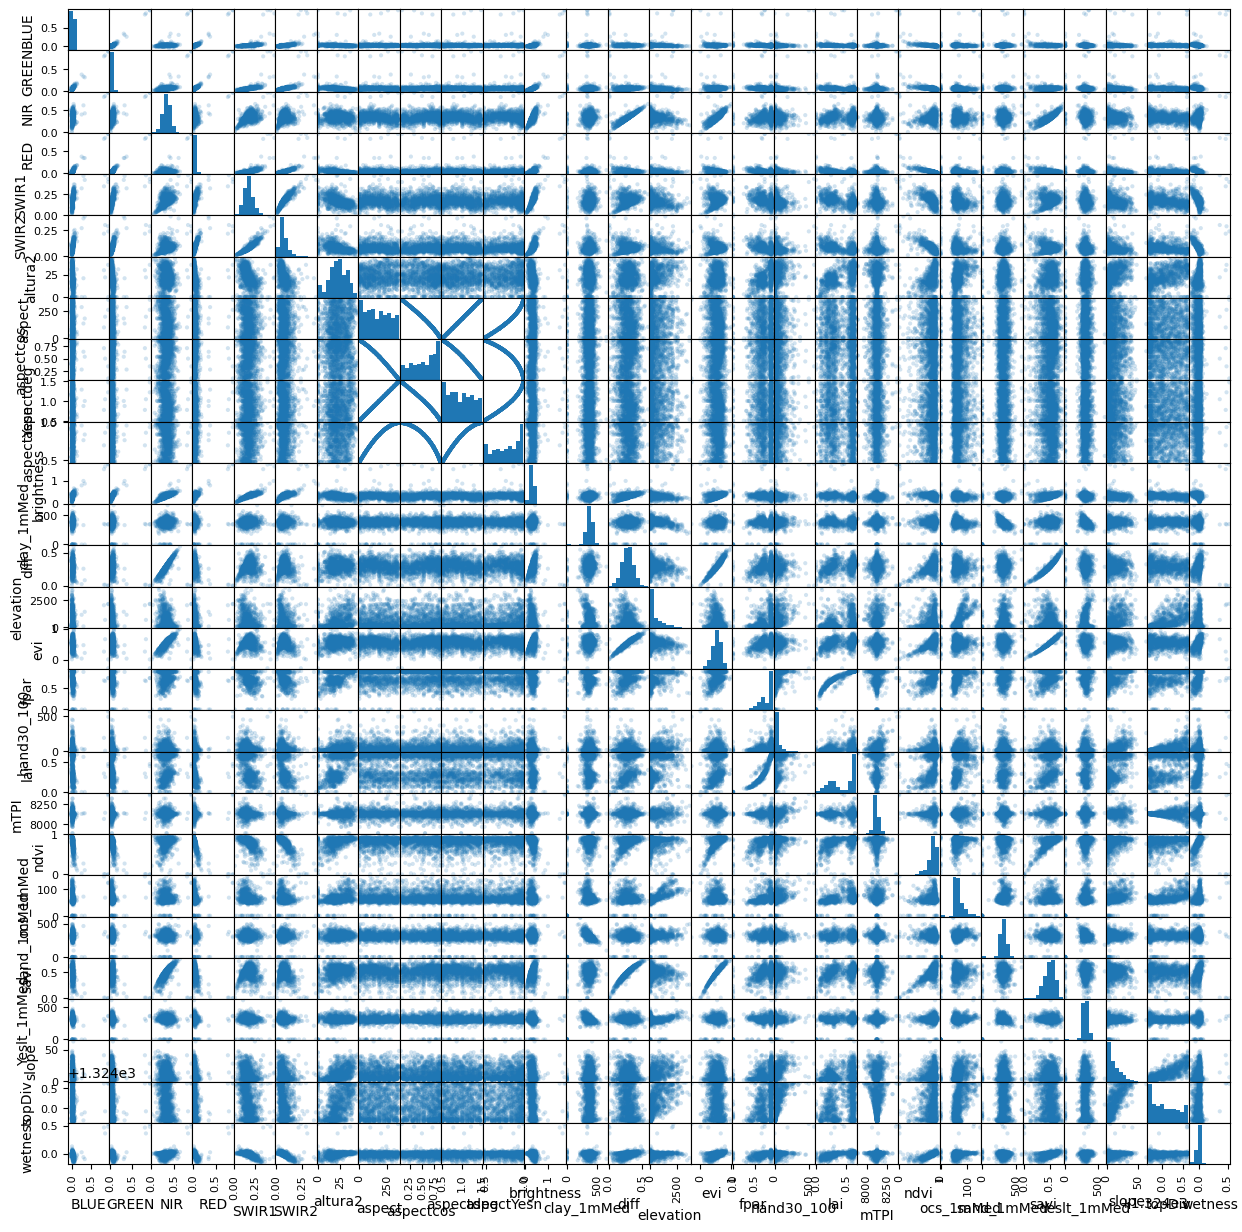

In [8]:
pd.plotting.scatter_matrix(sub_df[pred], alpha=0.2, figsize=(15, 15),)

- create the correlation matrix

In [9]:
sub_df[pred].corr()

BLUE     GREEN       NIR       RED     SWIR1     SWIR2  \
BLUE         1.000000  0.974091  0.392466  0.959609  0.455134  0.520295   
GREEN        0.974091  1.000000  0.483864  0.980587  0.570179  0.629452   
NIR          0.392466  0.483864  1.000000  0.357016  0.528946  0.328745   
RED          0.959609  0.980587  0.357016  1.000000  0.593213  0.692297   
SWIR1        0.455134  0.570179  0.528946  0.593213  1.000000  0.924926   
SWIR2        0.520295  0.629452  0.328745  0.692297  0.924926  1.000000   
altura2     -0.116645 -0.185799 -0.017998 -0.234983 -0.406518 -0.428689   
aspect       0.021572  0.006603 -0.117632  0.015155 -0.069901 -0.042638   
aspectcos   -0.019238 -0.002399  0.133291 -0.011179  0.084036  0.053112   
aspectdeg    0.021572  0.006603 -0.117632  0.015155 -0.069901 -0.042638   
aspectYesn   0.024484  0.013868 -0.085553  0.022087 -0.041572 -0.021079   
brightness   0.805092  0.883198  0.778143  0.838479  0.804105  0.745246   
clay_1mMed  -0.079995 -0.076131  0.095705 -0.094178  0.050567 -0.058992   
diff        -0.223935 -0.143891  0.792553 -0.286662  0.155234 -0.114780   
elevation    0.058252  0.012787 -0.211843  0.053082 -0.213866 -0.085857   
evi         -0.205213 -0.174754  0.725099 -0.327535  0.029058 -0.245706   
fpar        -0.141496 -0.168719  0.183377 -0.247598 -0.342838 -0.412505   
hand30_100   0.223253  0.178586 -0.021537  0.176007 -0.108444 -0.061002   
lai         -0.115459 -0.145257  0.167046 -0.216167 -0.367089 -0.395798   
mTPI         0.164152  0.154734  0.068618  0.147247  0.014019  0.016189   
ndvi        -0.542659 -0.598798  0.089144 -0.716732 -0.612618 -0.802703   
ocs_1mMed    0.057243  0.023342  0.008877  0.014737 -0.200614 -0.175589   
sand_1mMed  -0.033708 -0.047162  0.052034 -0.063286 -0.015317 -0.065479   
savi        -0.339089 -0.293415  0.659913 -0.439673 -0.044321 -0.323564   
Yeslt_1mMed -0.072376 -0.088523  0.000433 -0.098074 -0.089623 -0.173281   
slope        0.000309 -0.058919 -0.148538 -0.056022 -0.233701 -0.184624   
topDiv       0.008636 -0.059159 -0.196512 -0.041338 -0.249775 -0.187898   
wetness      0.447703  0.378697  0.387372  0.256853 -0.399648 -0.427671   

              altura2    aspect  aspectcos  aspectdeg  ...       lai  \
BLUE        -0.116645  0.021572  -0.019238   0.021572  ... -0.115459   
GREEN       -0.185799  0.006603  -0.002399   0.006603  ... -0.145257   
NIR         -0.017998 -0.117632   0.133291  -0.117632  ...  0.167046   
RED         -0.234983  0.015155  -0.011179   0.015155  ... -0.216167   
SWIR1       -0.406518 -0.069901   0.084036  -0.069901  ... -0.367089   
SWIR2       -0.428689 -0.042638   0.053112  -0.042638  ... -0.395798   
altura2      1.000000  0.063035  -0.061490   0.063035  ...  0.489748   
aspect       0.063035  1.000000  -0.995843   1.000000  ... -0.010538   
aspectcos   -0.061490 -0.995843   1.000000  -0.995843  ...  0.008509   
aspectdeg    0.063035  1.000000  -0.995843   1.000000  ... -0.010538   
aspectYesn   0.064538  0.981038  -0.959610   0.981038  ... -0.014766   
brightness  -0.228734 -0.062267   0.074837  -0.062267  ... -0.128516   
clay_1mMed   0.077326  0.052795  -0.052847   0.052795  ...  0.056102   
diff         0.134944 -0.130540   0.144004  -0.130540  ...  0.312445   
elevation    0.249800  0.046446  -0.042331   0.046446  ...  0.195064   
evi          0.233631 -0.120687   0.132345  -0.120687  ...  0.361619   
fpar         0.481874 -0.001392   0.000533  -0.001392  ...  0.921417   
hand30_100   0.229943  0.060693  -0.058725   0.060693  ...  0.189317   
lai          0.489748 -0.010538   0.008509  -0.010538  ...  1.000000   
mTPI        -0.031720 -0.006823   0.005384  -0.006823  ...  0.001392   
ndvi         0.491791  0.003807  -0.004955   0.003807  ...  0.485491   
ocs_1mMed    0.343214  0.010760  -0.012263   0.010760  ...  0.321571   
sand_1mMed   0.158751  0.019779  -0.024475   0.019779  ...  0.156537   
savi         0.250028 -0.109678   0.120716  -0.109678  ...  0.384378   
Yeslt_1mMed  0.116676  0.052152  -0.05269

- boxplots; due to the number of box plots, we will use matplotlib directly to create subplots

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

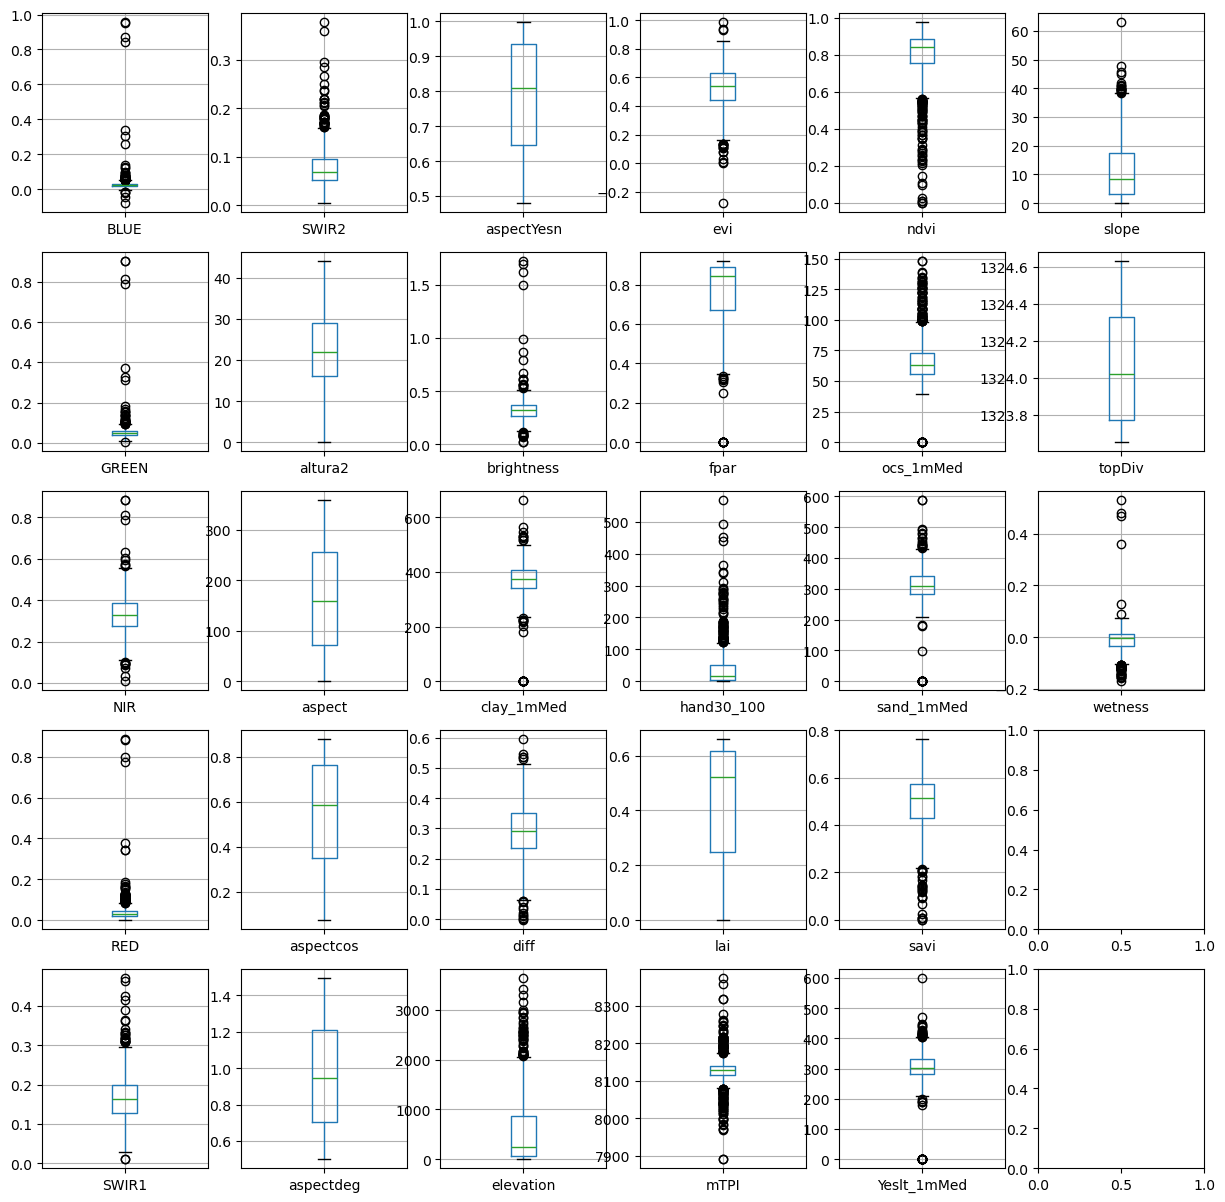

In [34]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(5,6,figsize=(15,15)) #make place holder for 30 box plots. Remember, we have 28 columns.
cnt=0
for nm in pred:
    r=cnt%5
    c=cnt//5
    sub_df[[nm]].boxplot(ax=ax[r,c])
    cnt+=1

ax

## Now let's look at the response variables 
### These are categorical variables so we have fewer ways to graphically display aspects of the data. In this instance we will create a grid of pie charts depicting the proportion of each category within a given response variable.

- pie charts for 11 response variables

array([[<Axes: title={'center': 'Use'}, ylabel='count'>,
        <Axes: title={'center': 'Grass'}, ylabel='count'>,
        <Axes: title={'center': 'Water'}, ylabel='count'>],
       [<Axes: title={'center': 'Cover'}, ylabel='count'>,
        <Axes: title={'center': 'Cultivation'}, ylabel='count'>,
        <Axes: title={'center': 'Another Class'}, ylabel='count'>],
       [<Axes: title={'center': 'Vegetation'}, ylabel='count'>,
        <Axes: title={'center': 'WetLand'}, ylabel='count'>,
        <Axes: title={'center': 'SAF'}, ylabel='count'>],
       [<Axes: title={'center': 'Herbaceous'}, ylabel='count'>,
        <Axes: title={'center': 'Terrain'}, ylabel='count'>, <Axes: >]],
      dtype=object)

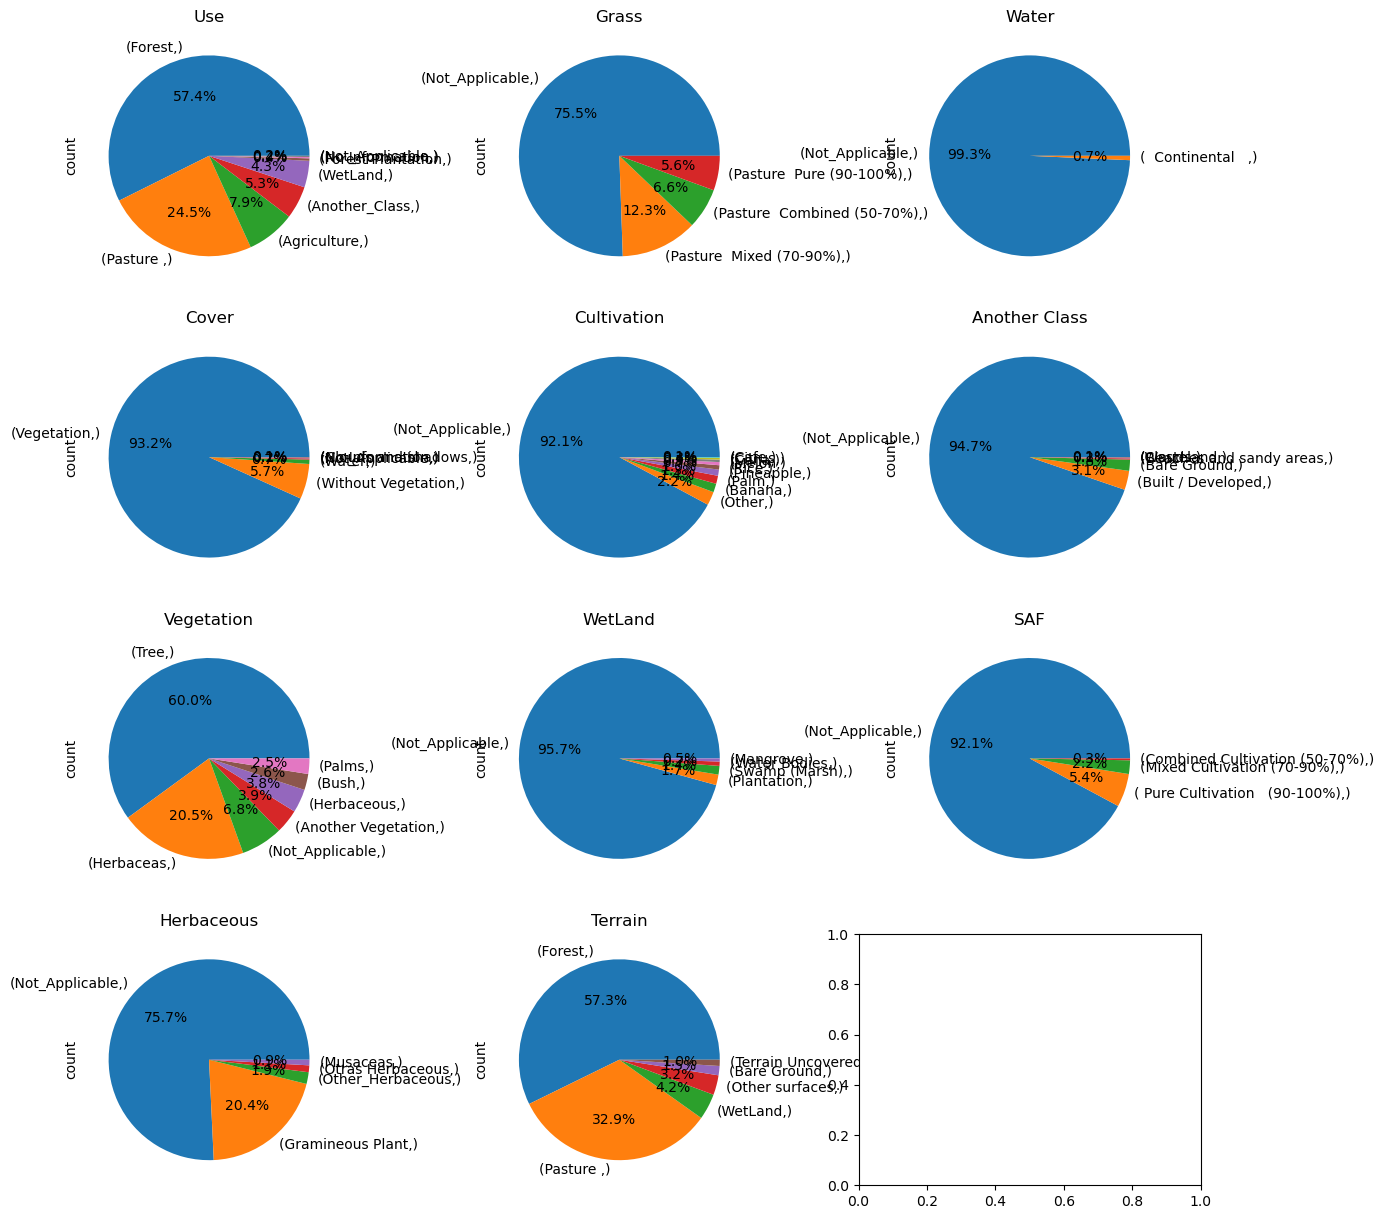

In [76]:
fig,ax=plt.subplots(4,3,figsize=(15,15)) #make place holder for 12 pie charts. Remember, we have 11 response columns.
cnt=0
for nm in resp:
    r=cnt%4
    c=cnt//4
    sub_df[[nm]].value_counts().plot(ax=ax[r,c],kind='pie',title=nm,autopct='%1.1f%%')
    cnt+=1

ax

## Exercise 1: Interpretation
- How many unique categories are in the Use column?
- What is the average lai value?
- What does the scatter plot matrix tell us?
- What does the correlation matrix tell us?
- What insights can we glen from the boxplots?
- What insights can we glen form the pie charts?
- Why did we ue a random sample of the plot subplot data?
- Task; explore general trends in the summarized plot data.


## From the scatter plot matrix and correlation matrix note the amount of linear correlation among the predictor variables. Let's perform a PCA using all the data and transform our data into independent components.

We wil be using sklearn to [scale](https://scikit-learn.org/stable/modules/preprocessing.html) and perform a [principal component analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) (PCA). If you want to learn more about PCAs check out sklearn's [user guide](https://scikit-learn.org/stable/modules/decomposition.html) and [examples](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py). Let's create a PCA and look at some of the results.

95% of the covariation can be explained using the first 13 components


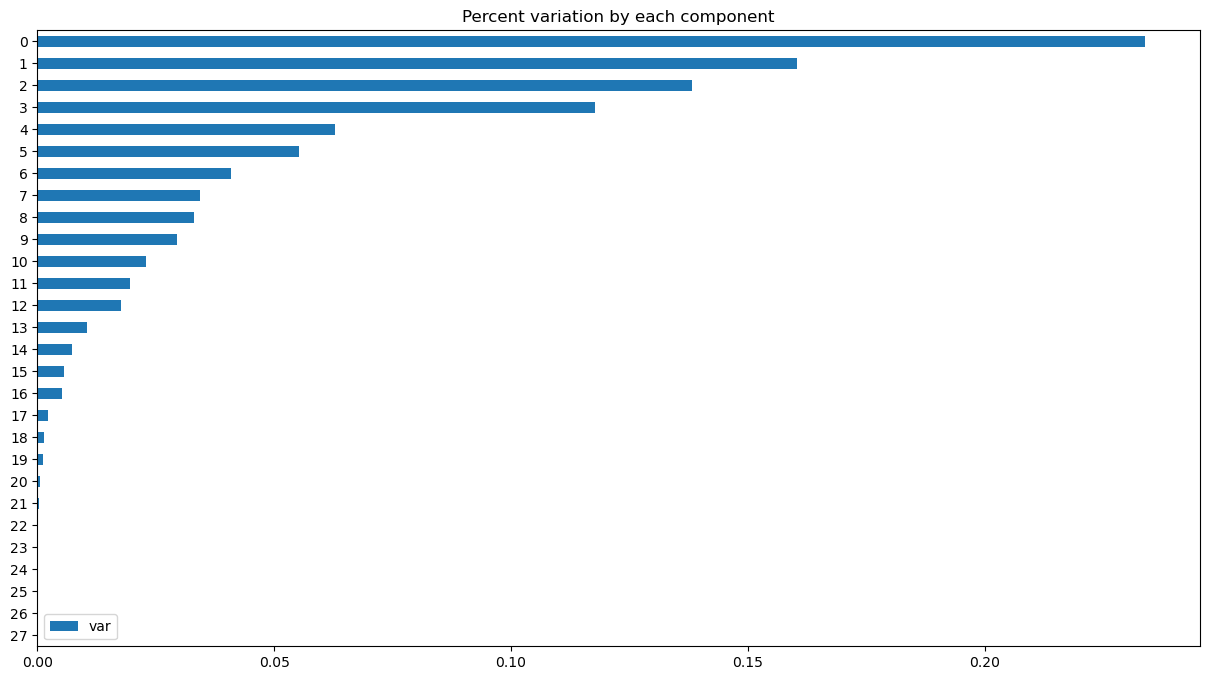

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss=StandardScaler(with_mean=False) #scaling data without centering on the mean because PCA will center the data.
X=plot_sub_df[pred].values
ss.fit(X)
X2=ss.transform(X) # scaling our values so they are comparable

pca = PCA()
pca.fit(X2) # fit the PCA on scaled values
vexp=pd.DataFrame(pca.explained_variance_ratio_,columns=['var']) # get the proportion of variance explained by each component

#find the number of components needed to account for 95% of the variation in the data
cmp=0
s=0
for v in vexp['var']:
    s+=v
    cmp+=1
    if(s>0.95):break
    
#plot % covariance explained
print('95% of the covariation can be explained using the first',cmp,'components')
vexp.plot(kind='barh',figsize=(15,8),title='Percent variation by each component').invert_yaxis()


### Displaying the % of variance explained by each component in this manner highlights that there was substantial linear correlation among predictor variables and gives us a graphical way to select how many components we want to keep in future analyses. In this case, we are looking to keep the minimum number of component that account for 95% of the variation(information) in the data. In the horizontal bar chart it appears that the accumulative amount of variation explained by adding the next component, levels off around the 14th component. Setting a threshold of 95% of the variation indicates we need to keep 13 components to account for 95% of the variation, which agrees with our visual interpretation of the horizontal bar chart. So let's transform our Google Earth Engine data into 13 independent components.

### Transform the predictor values to 13 components and plot a scatter plot matrix with Use labels.

In [65]:
cmp_df=pd.DataFrame(pca.transform(X2)[:,0:13]) #just keep the first 13 components and turn them into a dataframe
cmp_df['Use']=plot_sub_df['Use'] # add the use response variable to the dataframe
display(cmp_df)
uvls=cmp_df['Use'].value_counts()/cmp_df.shape[0]
print('Proportion of Use categories')
uvls

0         1         2         3         4         5         6  \
0       0.411862 -1.315640  1.359965 -2.877326 -0.384048  0.253482  0.180040   
1       1.419703  0.009791  0.251167 -2.034877 -0.707895  0.251950  0.216848   
2      -0.440532 -2.895080  0.265127 -1.562159  0.776651  1.305867  0.737563   
3      -0.469160 -1.242271  0.598180 -2.192296  0.528155  0.677874  0.396261   
4      -0.442693 -1.193889  0.048994 -1.531866  0.628630  0.803331  0.504531   
...          ...       ...       ...       ...       ...       ...       ...   
100609 -2.231792 -0.344833  3.916585 -0.257923 -1.771925 -0.697947  0.998389   
100610 -1.616856 -0.325759  3.333384 -0.401180 -1.737411 -0.159357 -0.356661   
100611 -2.706970 -0.456487  4.290991  0.271067 -1.909756 -1.177235  0.870211   
100612 -2.268713 -0.434119  3.802178  0.078985 -1.733680 -0.681579  1.166377   
100613 -1.601866 -0.251874  3.193630 -0.218576 -1.733593 -0.147718 -0.363185   

               7         8         9        10        11        12       Use  
0      -0.567613  0.124384 -0.043264  0.754297  0.222203 -0.910819    Forest  
1      -1.225711  0.131385 -0.083147  1.212028 -0.089349 -1.038278  Pasture   
2      -0.719233 -0.174857 -0.002489  1.156054 -0.735205 -0.774678  Pasture   
3      -0.297377 -0.102063 -0.054333  0.924850  0.413112 -1.116558    Forest  
4      -0.722149 -0.314435 -0.119966  1.534363  0.014814 -1.064945    Forest  
...          ...       ...       ...       ...       ...       ...       ...  
100609 -1.376620 -1.263930 -0.632313 -2.657977 -1.849554  0.216522    Forest  
100610 -1.631511 -1.894231 -0.810748 -2.861519 -1.932020  0.284204    Forest  
100611 -1.030247 -1.423510 -0.743400 -2.294412 -1.965433  0.840320    Forest  
100612 -1.282847 -1.150337 -0.596632 -2.605152 -1.892684  0.304213    Forest  
100613 -1.606543 -1.869790 -0.802910 -2.839541 -1.931433  0.304102    Forest  

[100614 rows x 14 columns]

Proportion of Use categories


Use
Forest               0.581072
Pasture              0.231002
Agriculture          0.083279
Another_Class        0.053780
WetLand              0.037102
Forest Plantation    0.008935
No Information       0.002684
Not_Applicable       0.002147
Name: count, dtype: float64

#### Do the proportion match the pie chart? Why or why not?
- scatter plot using components Use labels

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>,
        <Axes: xlabel='4', ylabel='0'>, <Axes: xlabel='5', ylabel='0'>,
        <Axes: xlabel='6', ylabel='0'>, <Axes: xlabel='7', ylabel='0'>,
        <Axes: xlabel='8', ylabel='0'>, <Axes: xlabel='9', ylabel='0'>,
        <Axes: xlabel='10', ylabel='0'>, <Axes: xlabel='11', ylabel='0'>,
        <Axes: xlabel='12', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>,
        <Axes: xlabel='4', ylabel='1'>, <Axes: xlabel='5', ylabel='1'>,
        <Axes: xlabel='6', ylabel='1'>, <Axes: xlabel='7', ylabel='1'>,
        <Axes: xlabel='8', ylabel='1'>, <Axes: xlabel='9', ylabel='1'>,
        <Axes: xlabel='10', ylabel='1'>, <Axes: xlabel='11', ylabel='1'>,
        <Axes: xlabel='12', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: x

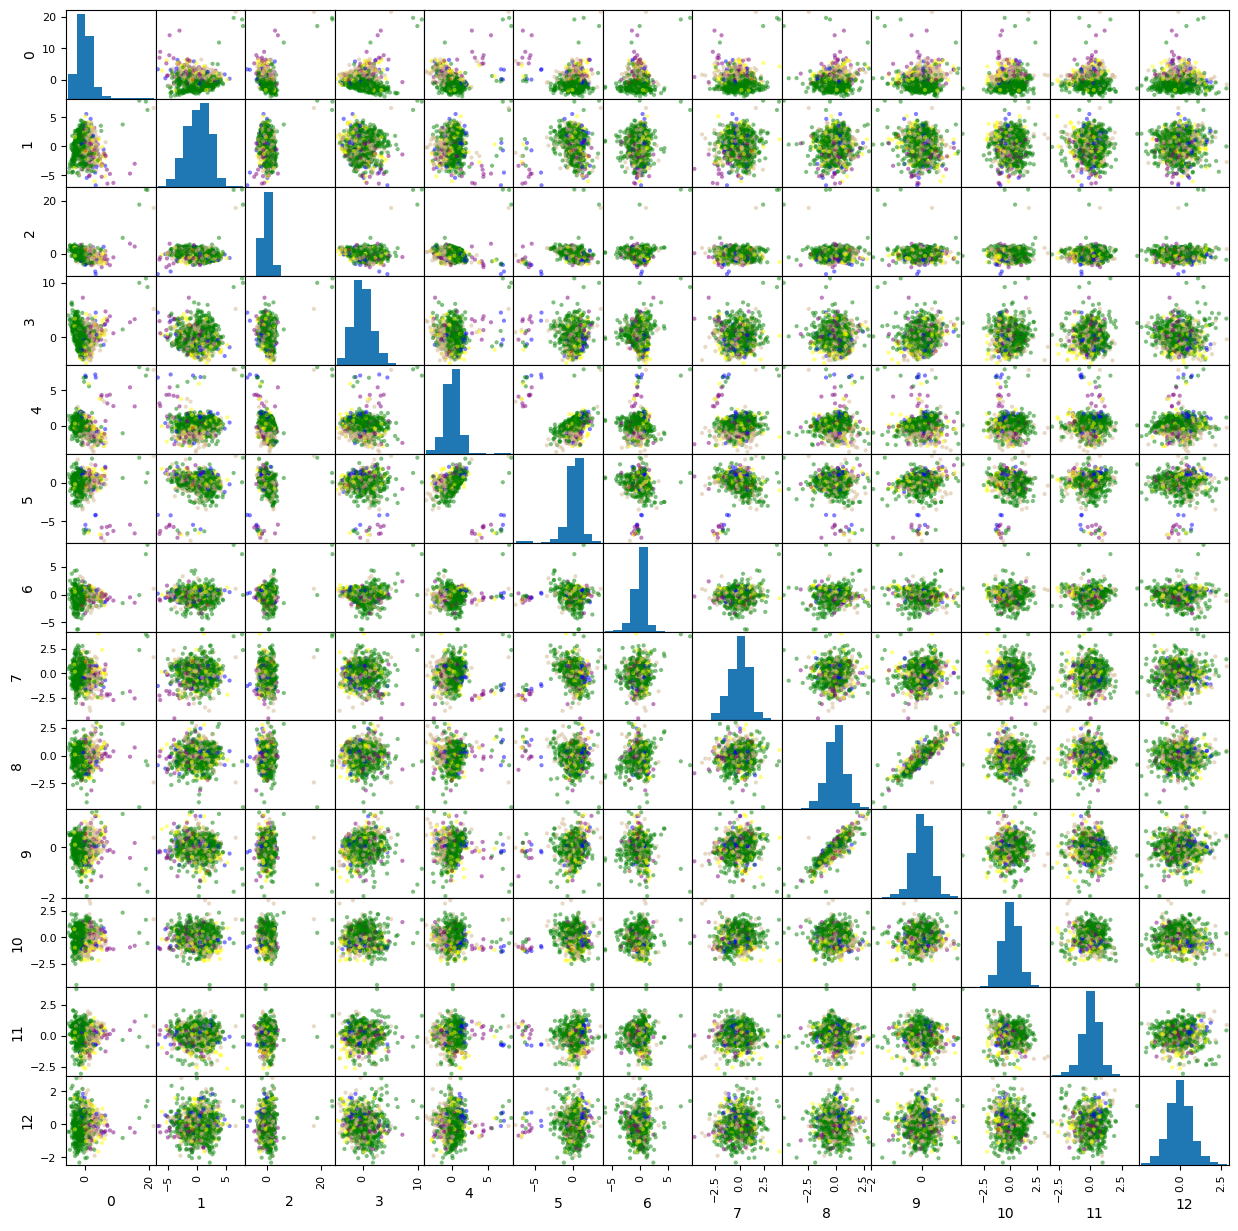

In [69]:
#Create a color dictionary for each category
color_dic={uvls.index[0]:'green',uvls.index[1]:'tan',uvls.index[2]:'yellow',uvls.index[3]:'purple',uvls.index[4]:'blue',uvls.index[5]:'brown',uvls.index[6]:'grey',uvls.index[7]:'grey'}
cmp_df['color']=cmp_df['Use'].map(color_dic)
tdf=cmp_df.iloc[ind]

#pd.plotting.scatter_matrix(tdf.iloc[:,0:-2])
pd.plotting.scatter_matrix(tdf[np.arange(13)],c=tdf['color'],figsize=(15,15))

### Plot the fist and second components

<Axes: xlabel='Comp1', ylabel='Comp2'>

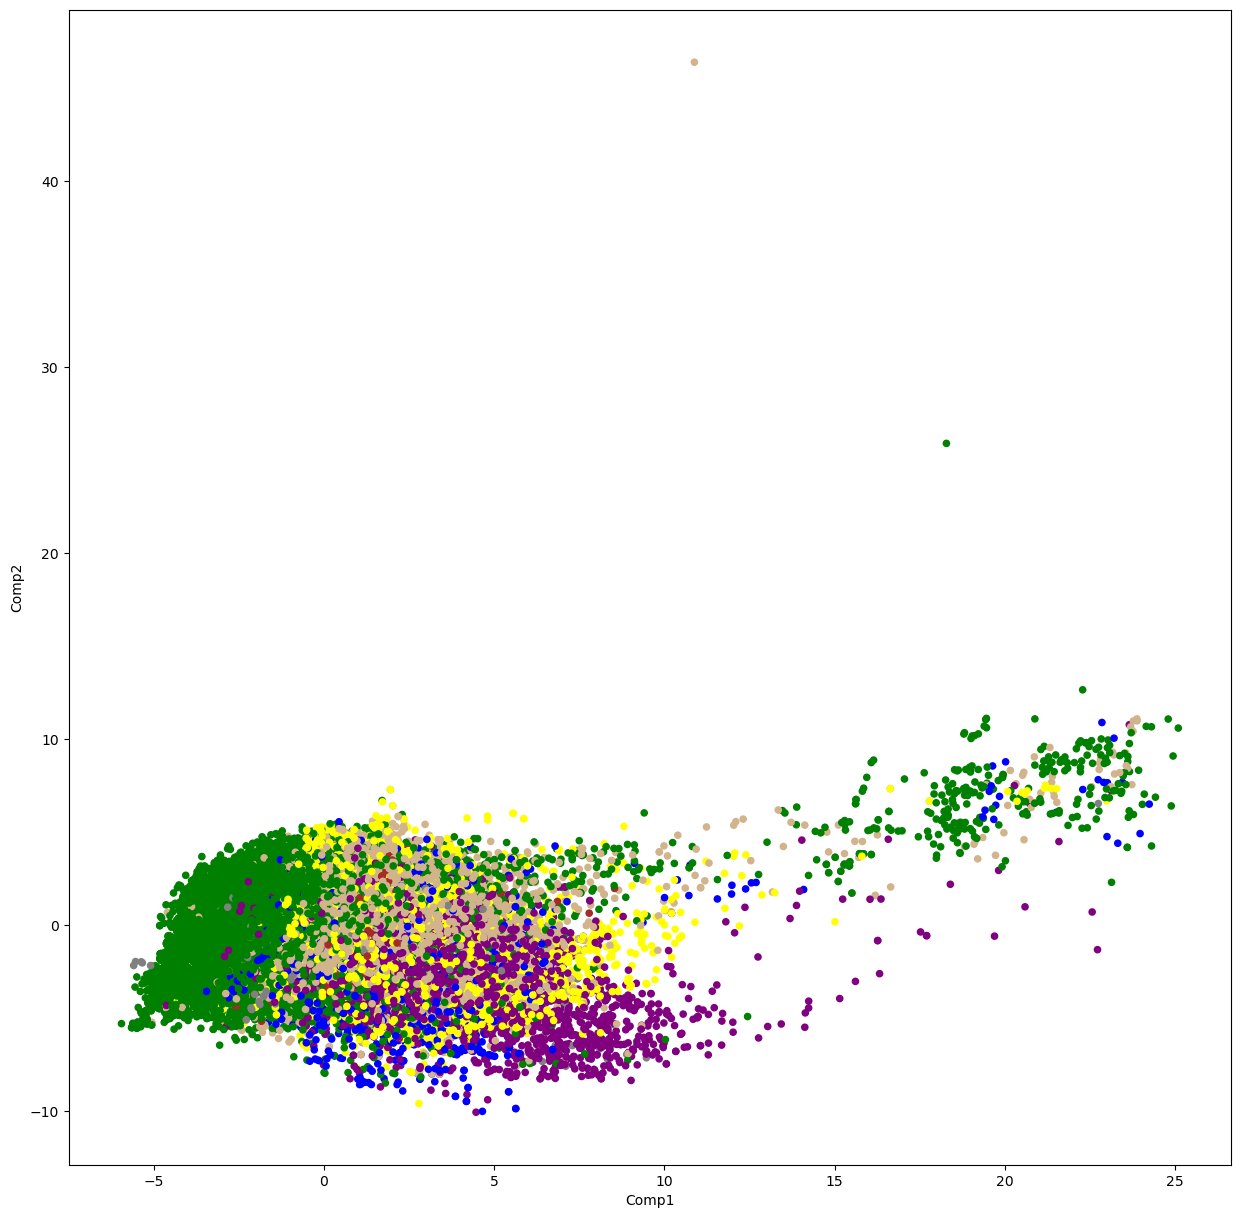

In [70]:
cmp_df.plot(kind='scatter',x=0,y=1,c='color',figsize=(15,15),xlabel='Comp1',ylabel='Comp2')

## Exercise 2: Interpretation 2
- What proportion of the variance is explained by the second principal component?
- Why did we scale our data before performing pca?
- What do the colors mean in the scatter plot matrix and the scatter plot of Comp1 and Comp2?
- What does component 1 and 2 mean?
- Does it look like various categories group together?
- Do you see any extreme values?
- Task: apply some of these same visualization approaches with the summarized plot data. Remember that the response variables are no longer categorical. We converted them to continuous variables (%).


## Extreme points and potential outliers
### To identify potential extreme values we will be using [Isolation_Forest](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py). Isolation Forest identifies extreme values by, "randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature". Extreme observations are labeled with a value of -1 while inner values are labeled with a 1. Additionally, anomaly distance can be calculated to rank extreme values. 

<Axes: xlabel='0', ylabel='1'>

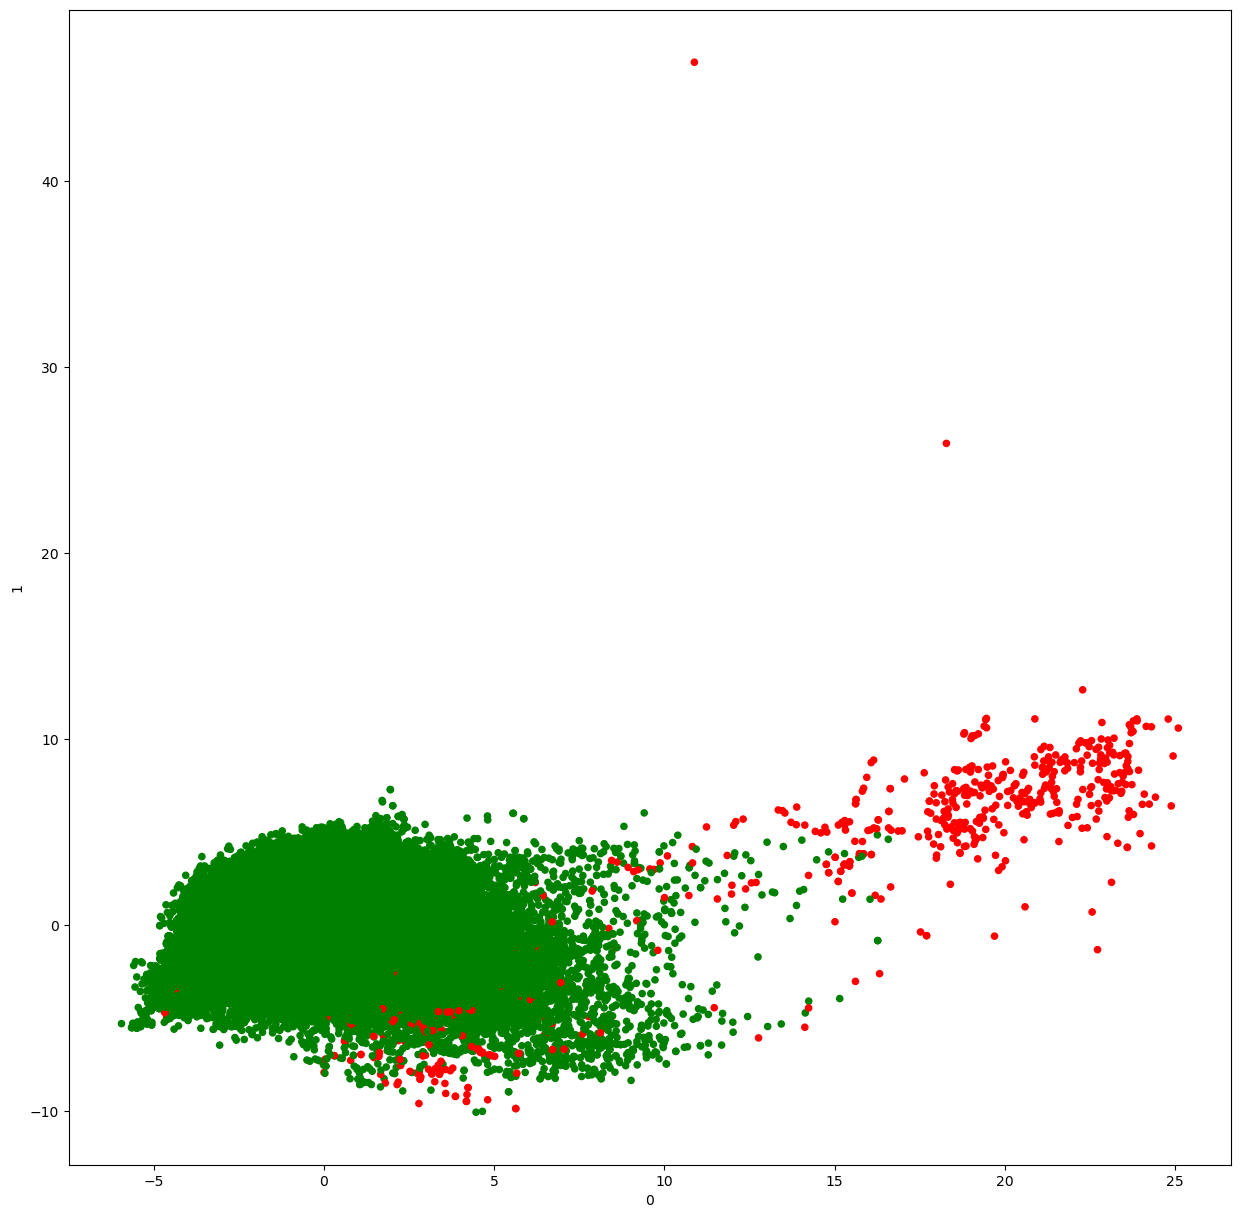

In [ ]:
from sklearn.ensemble import IsolationForest

#set the X values
X=cmp_df[cmp_df.columns[:13]]

isf = IsolationForest(max_samples=0.75, random_state=0)
isf.fit(X)

lbl=isf.predict(X) #1 is inner -1 is outer value
dist=isf.decision_function(X)
color_dic={1:'green',-1:'red'}
cmp_df['extreme']=lbl
cmp_df['an_dist']=dist
color=cmp_df['extreme'].map(color_dic)
cmp_df.plot(kind='scatter',x=0,y=1,c=color,figsize=(15,8))

## Exercise 3: Interpretation 3
- How many observation were labeled extreme?
- Interpret the meaning of the 0 by 1 scatter plot? What do the green and red points mean?
- What threshold was used to identify extreme values? Can you change that threshold?
- Are extreme values outliers?
- Should extreme value be removed from the analysis?
- How can you check if extreme values are outliers?
- If we decide to remove extreme values, how will that impact the summarized plot data?
- Task1: Create a graph that highlights anomaly distance.
- Task2: identify extreme values for the summarized plot data.